<a href="https://colab.research.google.com/github/BaDybala/Computational-Physics-Projects/blob/main/Gaussian%20Data%20Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np


## Simulate data


Let us simulate $N=10$ observations of a physical quantity with true value $\mu=10$, where the measurement errors have a standard deviation of $\sigma=0.1$.

We do this by drawing from a Gaussian pdf with mean $\mu$ and standard deviation $\sigma$.

In [ ]:
# create an instance of the default random number generator
rng = np.random.default_rng()
# draw samples
N, mu, sig = 5, 1, 0.1
x = rng.normal(mu,sig,N)
# print values
print(x)

[0.85283757 0.9667432  0.87318043 0.95196441 0.94817634]


Compute sample mean, variance and standard deviation

In [ ]:
x_mean = sum(x)/N
x_var = sum((x-x_mean)**2)/N
x_std = np.sqrt(x_var)
print(x_mean, x_var, x_std)

0.9185803914704265 0.002138668639360177 0.046245741851117246


Note that `numpy` provides some useful methods for this

In [ ]:
print(x.mean(), x.var(), x.std())
print(np.mean(x), np.var(x), np.std(x))

0.9185803914704265 0.002138668639360177 0.046245741851117246
0.9185803914704265 0.002138668639360177 0.046245741851117246


Let's repeat the process of drawing samples and computing the sample mean and standard deviation many times.

In [ ]:
N_sim = 1000


In [ ]:
x_mean = np.zeros(N_sim)
x_std = np.zeros(N_sim)
for i in range(N_sim):
  x = rng.normal(mu,sig,N)
  x_mean[i] = x.mean()
  x_std[i] = x.std()

An alternative way to do the same thing would be

In [ ]:
x = rng.normal(mu,sig,(N,N_sim))
x_mean = x.mean(axis=0)
x_std = x.std(axis=0)

The expectation value of the sample mean is $\mu$ and its variance is $\sigma^2/N$. Does our experiment match that prediction?

In [ ]:
print(x_mean.mean(),x_mean.var(), x_mean.std())
var_expected = sig**2 / N
sig_expected = sig / np.sqrt(N)
print(mu, var_expected, sig_expected)

1.002988446753421 0.002024674610236456 0.04499638441293318
1 0.0020000000000000005 0.044721359549995794


Seems ok. Let's plot a histogram to check the distribution is indeed Gaussian

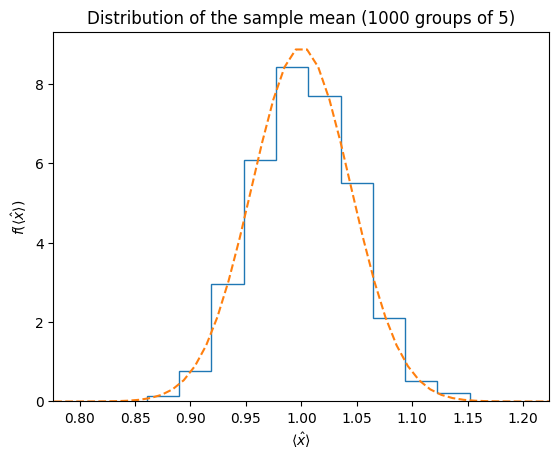

In [ ]:
# plot a histogram
plt.hist(x_mean,histtype='step', density=True , label='observed')
xx = np.linspace(mu-sig*5,mu+sig*5,100)
g = np.exp(-(xx-mu)**2/2/sig_expected**2) / np.sqrt(2*np.pi*sig_expected**2)
plt.plot(xx,g,'C1--', label='expected')
plt.xlim(mu-sig_expected*5,mu+sig_expected*5)
plt.xlabel(r'$\langle \hat{x} \rangle$')
plt.ylabel(r'$f(\langle \hat{x} \rangle)$')
plt.title('Distribution of the sample mean ({} groups of {})'.format(N_sim, N));

In the lectures we saw that the sample standard deviation is *biased*, meaning that its expectation value is not $\sigma$ but $\frac{N-1}{N}\sigma$). Let's see if our experiment bears that out.

In [ ]:
print(x_std.mean())
print(sig, sig*(N-1)/N)


0.08363199172885842
0.1 0.08


Here are some `numpy` shortcuts again - but beware!

In [ ]:
x_std_unbiased = x.std(axis=0,ddof=1) # this gives the wrong answer
x_var_unbiased = x.var(axis=0,ddof=1) # this gives the right answer
x_std_unbiased = np.sqrt(x_var_unbiased)